Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vadar_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading vadar_lexicon: Package 'vadar_lexicon' not
[nltk_data]     found in index


False

In [3]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding
from sklearn.metrics import classification_report

In [6]:
import warnings
warnings.filterwarnings('ignore')

EDA and Preprocessing

In [8]:
df = pd.read_table('amazon_alexa.tsv')

In [9]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [12]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [14]:
df.drop(['rating','date','variation'],axis=1,inplace=True)

In [15]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


Text Cleaning -:

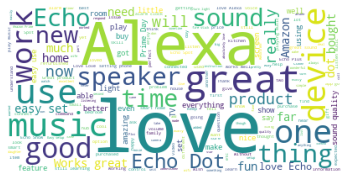

In [17]:
# positive reviews
wc = WordCloud(background_color='white')
wc.generate(' '.join(df[df['feedback']==1]['verified_reviews']))
plt.imshow(wc)
plt.axis('off')
plt.show()

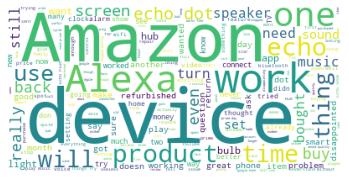

In [19]:
# positive reviews
wc = WordCloud(background_color='white')
wc.generate(' '.join(df[df['feedback']==0]['verified_reviews']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [20]:
def cleantext(text):
  token = word_tokenize(text.lower())
  wordtoken = [t for t in token if(t.isalpha())]
  stop = stopwords.words('english')
  cleantoken = [t for t in wordtoken if(t not in stop)]
  lemma = WordNetLemmatizer()
  lemmatoken = [lemma.lemmatize(t) for t in cleantoken]
  return ' '.join(lemmatoken)

In [21]:
df['verified_reviews'] = df['verified_reviews'].apply(cleantext)

In [22]:
x = df['verified_reviews']

In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [25]:
sid = SentimentIntensityAnalyzer()

In [26]:
def get_scores(text):
  return sid.polarity_scores(text)

In [27]:
df

,verified_reviews,feedback
0,love echo,1
1,loved,1
2,sometimes playing game answer question correct...,1
3,lot fun thing yr old learns dinosaur control l...,1
4,music,1
...,...,...
3145,perfect kid adult everyone,1
3146,listening music searching location checking ti...,1
3147,love thing running entire home tv light thermo...,1
3148,complaint sound quality great mostly use comma...,1


In [28]:
df['score'] = df['verified_reviews'].apply(get_scores)

In [29]:
df.head()

,verified_reviews,feedback,score
0,love echo,1,"{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp..."
1,loved,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,sometimes playing game answer question correct...,1,"{'neg': 0.145, 'neu': 0.654, 'pos': 0.201, 'co..."
3,lot fun thing yr old learns dinosaur control l...,1,"{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'comp..."
4,music,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [30]:
def givecompound(dictionary):
  return dictionary['compound']

In [31]:
d = get_scores('Amazon is a great website for online shopping')

In [32]:
givecompound(d)

0.7003

In [33]:
df['compound'] = df['score'].apply(givecompound)

In [34]:
df.head()

,verified_reviews,feedback,score,compound
0,love echo,1,"{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...",0.6369
1,loved,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5994
2,sometimes playing game answer question correct...,1,"{'neg': 0.145, 'neu': 0.654, 'pos': 0.201, 'co...",0.0516
3,lot fun thing yr old learns dinosaur control l...,1,"{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'comp...",0.9169
4,music,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [35]:
def prediction(compound):
  if(compound >=0):
    return 'positive'
  elif(compound <=0):
    return 'negative'
  else:
    return 'neutral'

In [37]:
df['analysis']=df['compound'].apply(prediction)

In [38]:
df.head()

,verified_reviews,feedback,score,compound,analysis
0,love echo,1,"{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...",0.6369,positive
1,loved,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5994,positive
2,sometimes playing game answer question correct...,1,"{'neg': 0.145, 'neu': 0.654, 'pos': 0.201, 'co...",0.0516,positive
3,lot fun thing yr old learns dinosaur control l...,1,"{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'comp...",0.9169,positive
4,music,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive


LSTM using Sentiment Analysis

In [39]:
df.drop(['score','compound'], axis=1, inplace=True)

In [40]:
x = df['verified_reviews']
y = df['analysis']

In [41]:
x

0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3       lot fun thing yr old learns dinosaur control l...
4                                                   music
                              ...                        
3145                           perfect kid adult everyone
3146    listening music searching location checking ti...
3147    love thing running entire home tv light thermo...
3148    complaint sound quality great mostly use comma...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [43]:
y.replace({'negative':0,'positive':1}, inplace=True)

In [44]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: analysis, Length: 3150, dtype: int64

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [48]:
reviewlen = []
for sent in df['verified_reviews']:
  reviewlen.append(len(word_tokenize(sent)))

In [49]:
df['reviewlen'] = reviewlen
df.head()

,verified_reviews,feedback,analysis,reviewlen
0,love echo,1,1,2
1,loved,1,1,1
2,sometimes playing game answer question correct...,1,1,17
3,lot fun thing yr old learns dinosaur control l...,1,1,18
4,music,1,1,1


In [51]:
maxlen =max(reviewlen)

In [52]:
np.quantile(reviewlen,0.95)

40.0

In [53]:
tokens = Tokenizer(char_level=False, split=' ')
tokens.fit_on_texts(xtrain)
tokens.index_word

{1: 'love',
 2: 'echo',
 3: 'great',
 4: 'alexa',
 5: 'work',
 6: 'music',
 7: 'use',
 8: 'like',
 9: 'sound',
 10: 'device',
 11: 'easy',
 12: 'one',
 13: 'dot',
 14: 'set',
 15: 'good',
 16: 'speaker',
 17: 'product',
 18: 'thing',
 19: 'get',
 20: 'amazon',
 21: 'time',
 22: 'play',
 23: 'home',
 24: 'still',
 25: 'would',
 26: 'really',
 27: 'light',
 28: 'prime',
 29: 'day',
 30: 'smart',
 31: 'also',
 32: 'show',
 33: 'much',
 34: 'new',
 35: 'better',
 36: 'quality',
 37: 'well',
 38: 'bought',
 39: 'room',
 40: 'fun',
 41: 'need',
 42: 'far',
 43: 'alarm',
 44: 'got',
 45: 'even',
 46: 'could',
 47: 'everything',
 48: 'plus',
 49: 'feature',
 50: 'make',
 51: 'able',
 52: 'video',
 53: 'learning',
 54: 'say',
 55: 'turn',
 56: 'house',
 57: 'nice',
 58: 'weather',
 59: 'clock',
 60: 'phone',
 61: 'want',
 62: 'buy',
 63: 'tv',
 64: 'little',
 65: 'ask',
 66: 'know',
 67: 'hub',
 68: 'tell',
 69: 'used',
 70: 'spot',
 71: 'price',
 72: 'purchase',
 73: 'bulb',
 74: 'using',
 75:

In [54]:
vocablen =len(tokens.index_word)
vocablen

2941

In [55]:
seq_train = tokens.texts_to_sequences(xtrain)
seq_train

[[5, 37, 1738, 180, 1229, 15, 24, 253, 8, 1230, 983],
 [24, 77, 69, 4, 92, 1231],
 [1, 10, 50, 203, 238, 278],
 [],
 [3,
  17,
  41,
  239,
  1739,
  14,
  259,
  21,
  58,
  1740,
  1741,
  5,
  111,
  69,
  43,
  59,
  6,
  89,
  1],
 [26, 188, 260, 446, 19, 829, 270, 573, 151],
 [131, 86, 40, 69, 204, 24, 53, 240],
 [1, 643, 155, 43, 59, 89, 1, 644, 162, 574, 80],
 [1, 2, 32, 51, 75, 381, 104, 22, 51, 261, 343, 76, 241],
 [90, 4, 722, 10, 42, 1232, 1233],
 [1,
  723,
  143,
  181,
  90,
  90,
  2,
  107,
  69,
  47,
  27,
  163,
  5,
  162,
  344,
  37,
  259,
  984,
  77,
  575,
  137,
  724,
  18,
  126,
  1742,
  1743,
  25,
  152,
  414],
 [182, 18, 53],
 [1],
 [1,
  18,
  98,
  25,
  576,
  577,
  1234,
  61,
  100,
  138,
  645,
  183,
  3,
  415,
  45,
  1235,
  18,
  8,
  985,
  183,
  725,
  480,
  139,
  132,
  72,
  242,
  163,
  44,
  28,
  29,
  243,
  301,
  71],
 [109,
  382,
  271,
  525,
  80,
  11,
  94,
  447,
  20,
  82,
  31,
  38,
  1744,
  27,
  73,
  261,
  2

In [56]:
seq_matrix = sequence.pad_sequences(seq_train, maxlen=maxlen)
seq_matrix

array([[   0,    0,    0, ...,    8, 1230,  983],
       [   0,    0,    0, ...,    4,   92, 1231],
       [   0,    0,    0, ...,  203,  238,  278],
       ...,
       [   0,    0,    0, ...,  191,    3,   17],
       [   0,    0,    0, ...,    0,    0,  385],
       [   0,    0,    0, ...,    1,    2,   70]], dtype=int32)

In [58]:
rnn = Sequential()

rnn.add(Embedding(vocablen+1,700, input_length=maxlen, mask_zero=True))
rnn.add(SimpleRNN(units=32, activation='tanh'))
rnn.add(Dense(units=32, activation='relu'))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1, activation='sigmoid'))
rnn.compile(optimizer='adam', loss='binary_crossentropy')
rnn.fit(seq_matrix, ytrain, batch_size=50, epochs=50)

rnn.compile(optimizer='adam', loss='binary_crossentropy')
rnn.fit(seq_matrix, ytrain, batch_size=50, epochs=50)

seq_test = sequence.pad_sequences(tokens.texts_to_sequences(xtest), maxlen=maxlen)

ypred = rnn.predict(seq_test)
ypred = ypred >0.5


Epoch 1/50
45/45 [==============================] - 11s 210ms/step - loss: 0.3929
Epoch 2/50
45/45 [==============================] - 10s 211ms/step - loss: 0.1664
Epoch 3/50
45/45 [==============================] - 10s 212ms/step - loss: 0.0585
Epoch 4/50
45/45 [==============================] - 10s 213ms/step - loss: 0.0256
Epoch 5/50
45/45 [==============================] - 10s 220ms/step - loss: 0.0183
Epoch 6/50
45/45 [==============================] - 10s 223ms/step - loss: 0.0159
Epoch 7/50
45/45 [==============================] - 10s 222ms/step - loss: 0.0143
Epoch 8/50
45/45 [==============================] - 10s 221ms/step - loss: 0.0127
Epoch 9/50
45/45 [==============================] - 10s 219ms/step - loss: 0.0115
Epoch 10/50
45/45 [==============================] - 10s 225ms/step - loss: 0.0101
Epoch 11/50
45/45 [==============================] - 10s 216ms/step - loss: 0.0088
Epoch 12/50
45/45 [==============================] - 10s 229ms/step - loss: 0.0077
Epoch 13/50
4

In [59]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.38      0.38      0.38        39
           1       0.97      0.97      0.97       906

    accuracy                           0.95       945
   macro avg       0.67      0.68      0.68       945
weighted avg       0.95      0.95      0.95       945



In [61]:
rnn = Sequential()

rnn.add(Embedding(vocablen+1,
700, input_length=maxlen, mask_zero=True))
rnn.add(LSTM(units=32, activation='tanh'))
rnn.add(Dense(units=32, activation='relu'))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1, activation='sigmoid'))
rnn.compile(optimizer='adam', loss='binary_crossentropy')
rnn.fit(seq_matrix, ytrain, batch_size=50, epochs=50)

seq_test = sequence.pad_sequences(tokens.texts_to_sequences(xtest), maxlen=maxlen)

ypred = rnn.predict(seq_test)
ypred = ypred >0.5

Epoch 1/50
45/45 [==============================] - 24s 432ms/step - loss: 0.4015
Epoch 2/50
45/45 [==============================] - 25s 555ms/step - loss: 0.1594
Epoch 3/50
45/45 [==============================] - 24s 524ms/step - loss: 0.0781
Epoch 4/50
45/45 [==============================] - 19s 429ms/step - loss: 0.0348
Epoch 5/50
45/45 [==============================] - 19s 427ms/step - loss: 0.0223
Epoch 6/50
45/45 [==============================] - 19s 428ms/step - loss: 0.0180
Epoch 7/50
45/45 [==============================] - 19s 425ms/step - loss: 0.0165
Epoch 8/50
45/45 [==============================] - 19s 430ms/step - loss: 0.0148
Epoch 9/50
45/45 [==============================] - 19s 427ms/step - loss: 0.0130
Epoch 10/50
45/45 [==============================] - 19s 428ms/step - loss: 0.0117
Epoch 11/50
45/45 [==============================] - 19s 428ms/step - loss: 0.0100
Epoch 12/50
45/45 [==============================] - 19s 430ms/step - loss: 0.0092
Epoch 13/50
4

In [62]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.55      0.44      0.49        39
           1       0.98      0.98      0.98       906

    accuracy                           0.96       945
   macro avg       0.76      0.71      0.73       945
weighted avg       0.96      0.96      0.96       945

